In [15]:
import torch
from torch.utils.data import DataLoader, random_split
from torchtext.datasets import WikiText2
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer
from torchtext import vocab
import matplotlib.pyplot as plt
import pandas as pd
import pygwalker as pyg

In [2]:
train_iter, valid_iter, test_iter  = WikiText2('./../WikiText2')

In [3]:
tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(tokenizer, train_iter), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

In [4]:
word_freq_dict = {}
for tokens in map(tokenizer, train_iter):
    for token in tokens:
        if token in word_freq_dict:
            word_freq_dict[token] += 1
        else:
            word_freq_dict[token] = 1       

In [5]:
sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)

[('the', 130768),
 (',', 102615),
 ('.', 83397),
 ('of', 57030),
 ('<unk>', 54625),
 ('and', 50735),
 ('in', 45015),
 ('to', 39521),
 ('a', 36523),
 ('=', 29570),
 ('was', 21008),
 ("'", 18484),
 ('@-@', 16906),
 ('on', 15140),
 ('as', 15058),
 ('s', 14936),
 ('that', 14351),
 ('for', 13794),
 ('with', 13012),
 ('by', 12718),
 (')', 12004),
 ('(', 11992),
 ('@', 11786),
 ('is', 11691),
 ('it', 9273),
 ('from', 9229),
 ('at', 9070),
 ('his', 9019),
 ('he', 8706),
 ('were', 7334),
 ('an', 6250),
 ('had', 5707),
 ('which', 5546),
 ('be', 4859),
 ('are', 4714),
 ('this', 4560),
 ('their', 4290),
 ('first', 4242),
 ('but', 4233),
 ('not', 4006),
 ('–', 3934),
 ('one', 3910),
 ('they', 3894),
 ('its', 3877),
 ('also', 3842),
 ('after', 3749),
 ('her', 3670),
 ('or', 3655),
 ('two', 3565),
 ('have', 3470),
 ('has', 3325),
 ('been', 3263),
 ('who', 3029),
 ('she', 2884),
 ('new', 2767),
 ('other', 2729),
 ('during', 2690),
 ('when', 2655),
 ('time', 2607),
 ('all', 2557),
 ('into', 2443),
 ('m

In [8]:
word_freq_pairs = sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)

word_to_new_index = {word: index for index, (word, _) in enumerate(word_freq_pairs)}
vocab.stoi = word_to_new_index

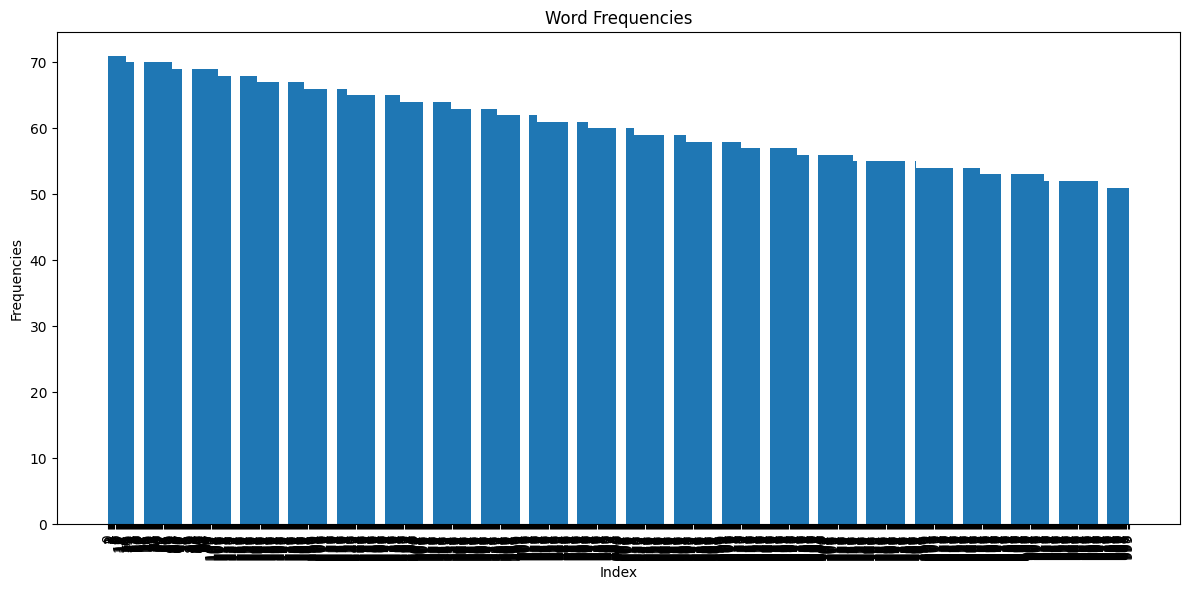

In [59]:
word_freq_dict = dict(word_freq_pairs[3000:4000])


# Separate words and their frequencies
words = list(word_freq_dict.keys())
frequencies = list(word_freq_dict.values())

plt.figure(figsize=(12, 6))
plt.bar(range(len(words)), frequencies)
plt.xlabel('Index')
plt.ylabel('Frequencies')
plt.title('Word Frequencies')
plt.xticks(range(len(words)), rotation=90)  # Use indices as ticks with words as labels

plt.subplots_adjust(bottom=0.1)  # Increase or decrease the bottom margin as needed

plt.tight_layout()
plt.show()

In [13]:
word_freq_pairs

[('the', 130768),
 (',', 102615),
 ('.', 83397),
 ('of', 57030),
 ('<unk>', 54625),
 ('and', 50735),
 ('in', 45015),
 ('to', 39521),
 ('a', 36523),
 ('=', 29570),
 ('was', 21008),
 ("'", 18484),
 ('@-@', 16906),
 ('on', 15140),
 ('as', 15058),
 ('s', 14936),
 ('that', 14351),
 ('for', 13794),
 ('with', 13012),
 ('by', 12718),
 (')', 12004),
 ('(', 11992),
 ('@', 11786),
 ('is', 11691),
 ('it', 9273),
 ('from', 9229),
 ('at', 9070),
 ('his', 9019),
 ('he', 8706),
 ('were', 7334),
 ('an', 6250),
 ('had', 5707),
 ('which', 5546),
 ('be', 4859),
 ('are', 4714),
 ('this', 4560),
 ('their', 4290),
 ('first', 4242),
 ('but', 4233),
 ('not', 4006),
 ('–', 3934),
 ('one', 3910),
 ('they', 3894),
 ('its', 3877),
 ('also', 3842),
 ('after', 3749),
 ('her', 3670),
 ('or', 3655),
 ('two', 3565),
 ('have', 3470),
 ('has', 3325),
 ('been', 3263),
 ('who', 3029),
 ('she', 2884),
 ('new', 2767),
 ('other', 2729),
 ('during', 2690),
 ('when', 2655),
 ('time', 2607),
 ('all', 2557),
 ('into', 2443),
 ('m

In [37]:
{f'{idx}': fre for idx, (word, fre) in enumerate(word_freq_pairs)}['100']

1447

In [35]:
df = pd.DataFrame(list({f'{idx}': fre for idx, (word, fre) in enumerate(word_freq_pairs)}.items()), columns=['Index', 'Frequency'])
walker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-8" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [20]:
df

,Word,Frequency
0,the,130768
1,",",102615
2,.,83397
3,of,57030
4,<unk>,54625
...,...,...
28777,roundabouts,3
28778,tuscola,3
28779,northeasterly,3
28780,intergrades,3
